##### * Importing some useful libraries

In [1]:
pip install selenium

Note: you may need to restart the kernel to use updated packages.


In [9]:
import pandas as pd # use for data manipulation and analysis
import numpy as np # use for multi-dimensional array and matrix

import seaborn as sns # use for high-level interface for drawing attractive and informative statistical graphics 
import matplotlib.pyplot as plt # It provides an object-oriented API for embedding plots into applications
%matplotlib inline 
# It sets the backend of matplotlib to the 'inline' backend:
import time # calculate time 

from sklearn.linear_model import LogisticRegression # algo use to predict good or bad
from sklearn.naive_bayes import MultinomialNB # nlp algo use to predict good or bad

from sklearn.model_selection import train_test_split # spliting the data between feature and target
from sklearn.metrics import classification_report # gives whole report about metrics (e.g, recall,precision,f1_score,c_m)
from sklearn.metrics import confusion_matrix # gives info about actual and predict
from nltk.tokenize import RegexpTokenizer # regexp tokenizers use to split words from text  
from nltk.stem.snowball import SnowballStemmer # stemmes words
from sklearn.feature_extraction.text import CountVectorizer # create sparse matrix of words using regexptokenizes  
from sklearn.pipeline import make_pipeline # use for combining all prerocessors techniuqes and algos

from PIL import Image # getting images in notebook
# from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator# creates words colud

from bs4 import BeautifulSoup # use for scraping the data from website
from selenium import webdriver # use for automation chrome 
import networkx as nx # for the creation, manipulation, and study of the structure, dynamics, and functions of complex networks.

import pickle# use to dump model 

import warnings # ignores pink warnings 
warnings.filterwarnings('ignore')

* **Did some surfing and found some websites offering malicious links.** And found some datasets

In [10]:
phishing_data1 = pd.read_csv('phishing_site_urls.csv')
phishing_data1.columns = ['URL','Label']
# phishing_data2 = pd.read_csv('phishing_data.csv')
# phishing_data2.columns = ['URL','Label']
# phishing_data3 = pd.read_csv('phishing_data2.csv')
# phishing_data3.columns = ['URL','Label']

In [ ]:
for l in range(len(phishing_data1.Label)):
    if phishing_data1.Label.loc[l] == '1.0':
        phishing_data1.Label.loc[l] = 'bad'
    else:
        phishing_data1.Label.loc[l] = 'good'

* **Concatenate All datasets in one.**

In [ ]:
frames = [phishing_data1, phishing_data2, phishing_data3]
phishing_urls = pd.concat(frames)

In [ ]:
#saving dataset
phishing_urls.to_csv(r'phishing_site_urls.csv', index = False)

* **Loading the main dataset.**

In [7]:
phish_data = pd.read_csv('phishing_site_urls.csv')

#### * You can download dataset from my **Kaggle** Profile <a href='https://www.kaggle.com/taruntiwarihp/phishing-site-urls'>here</a>

In [8]:
phish_data.head()

,URL,Label
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad
3,mail.printakid.com/www.online.americanexpress....,bad
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad


In [9]:
phish_data.tail()

,URL,Label
549341,23.227.196.215/,bad
549342,apple-checker.org/,bad
549343,apple-iclods.org/,bad
549344,apple-uptoday.org/,bad
549345,apple-search.info,bad


In [10]:
phish_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549346 entries, 0 to 549345
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   URL     549346 non-null  object
 1   Label   549346 non-null  object
dtypes: object(2)
memory usage: 8.4+ MB


* **About dataset**
* Data is containg 5,49,346 unique entries.
* There are two columns.
* Label column is prediction col which has 2 categories 
    A. Good - which means the urls is not containing malicious stuff and **this site is not a Phishing Site.**
    B. Bad - which means the urls contains malicious stuffs and **this site isa Phishing Site.**
* There is no missing value in the dataset.

In [11]:
phish_data.isnull().sum() # there is no missing values

URL      0
Label    0
dtype: int64

* **Since it is classification problems so let's see the classes are balanced or imbalances**

In [12]:
#create a dataframe of classes counts
label_counts = pd.DataFrame(phish_data.Label.value_counts())

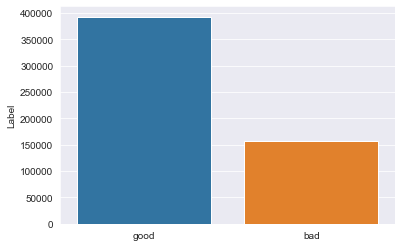

In [13]:
#visualizing target_col
sns.set_style('darkgrid')
sns.barplot(label_counts.index,label_counts.Label)

### Preprocessing

* **Now that we have the data, we have to vectorize our URLs. I used CountVectorizer and gather words using tokenizer, since there are words in urls that are more important than other words e.g ‘virus’, ‘.exe’ ,’.dat’ etc. Lets convert the URLs into a vector form.**

#### RegexpTokenizer
* A tokenizer that splits a string using a regular expression, which matches either the tokens or the separators between tokens.

In [14]:
tokenizer = RegexpTokenizer(r'[A-Za-z]+')

In [15]:
phish_data.URL[0]

'nobell.it/70ffb52d079109dca5664cce6f317373782/login.SkyPe.com/en/cgi-bin/verification/login/70ffb52d079109dca5664cce6f317373/index.php?cmd=_profile-ach&outdated_page_tmpl=p/gen/failed-to-load&nav=0.5.1&login_access=1322408526'

In [16]:
# this will be pull letter which matches to expression
tokenizer.tokenize(phish_data.URL[0]) # using first row

['nobell',
 'it',
 'ffb',
 'd',
 'dca',
 'cce',
 'f',
 'login',
 'SkyPe',
 'com',
 'en',
 'cgi',
 'bin',
 'verification',
 'login',
 'ffb',
 'd',
 'dca',
 'cce',
 'f',
 'index',
 'php',
 'cmd',
 'profile',
 'ach',
 'outdated',
 'page',
 'tmpl',
 'p',
 'gen',
 'failed',
 'to',
 'load',
 'nav',
 'login',
 'access']

In [17]:
print('Getting words tokenized ...')
t0= time.perf_counter()
phish_data['text_tokenized'] = phish_data.URL.map(lambda t: tokenizer.tokenize(t)) # doing with all rows
t1 = time.perf_counter() - t0
print('Time taken',t1 ,'sec')

Getting words tokenized ...
Time taken 2.9692887000001065 sec


In [18]:
phish_data.sample(5)

,URL,Label,text_tokenized
116331,ippartner.cl/js/vendor/PDFFILE/,bad,"[ippartner, cl, js, vendor, PDFFILE]"
245410,tdworld.com/substations/abb-hydro-quebec-conve...,good,"[tdworld, com, substations, abb, hydro, quebec..."
77060,www.rcbowen.com/imho/perl/modules.html,good,"[www, rcbowen, com, imho, perl, modules, html]"
87772,alumnus.caltech.edu/~dank/nansi/,good,"[alumnus, caltech, edu, dank, nansi]"
183597,english.turkcebilgi.com/Kay+E.+Kuter,good,"[english, turkcebilgi, com, Kay, E, Kuter]"


#### SnowballStemmer
* Snowball is a small string processing language, gives root words

In [19]:
stemmer = SnowballStemmer("english") # choose a language

In [20]:
print('Getting words stemmed ...')
t0= time.perf_counter()
phish_data['text_stemmed'] = phish_data['text_tokenized'].map(lambda l: [stemmer.stem(word) for word in l])
t1= time.perf_counter() - t0
print('Time taken',t1 ,'sec')

Getting words stemmed ...
Time taken 65.47331899999995 sec


In [21]:
phish_data.sample(5)

,URL,Label,text_tokenized,text_stemmed
350923,helsinki.fi/~vholmber/antiolympia/inaogcs.html,good,"[helsinki, fi, vholmber, antiolympia, inaogcs,...","[helsinki, fi, vholmber, antiolympia, inaogc, ..."
457494,utah.gov/governor/news_media/article.html?arti...,good,"[utah, gov, governor, news, media, article, ht...","[utah, gov, governor, news, media, articl, htm..."
505764,game6media.com/g76ub76,bad,"[game, media, com, g, ub]","[game, media, com, g, ub]"
215588,movies.about.com/od/newmanpaul/a/paulnewman927...,good,"[movies, about, com, od, newmanpaul, a, paulne...","[movi, about, com, od, newmanpaul, a, paulnewm..."
543524,www.bannered.4dq.com/monitor/images/Smartzh131...,bad,"[www, bannered, dq, com, monitor, images, Smar...","[www, banner, dq, com, monitor, imag, smartzh,..."


In [22]:
print('Getting joiningwords ...')
t0= time.perf_counter()
phish_data['text_sent'] = phish_data['text_stemmed'].map(lambda l: ' '.join(l))
t1= time.perf_counter() - t0
print('Time taken',t1 ,'sec')

Getting joiningwords ...
Time taken 0.28049140000007355 sec


In [23]:
phish_data.sample(5)

,URL,Label,text_tokenized,text_stemmed,text_sent
283653,artfact.com/artist/gifford-charles-henry-tn12u...,good,"[artfact, com, artist, gifford, charles, henry...","[artfact, com, artist, gifford, charl, henri, ...",artfact com artist gifford charl henri tn uwr r
535859,crealymeadows.com/nxc5c,bad,"[crealymeadows, com, nxc, c]","[crealymeadow, com, nxc, c]",crealymeadow com nxc c
525240,secon1.ddns.net/,bad,"[secon, ddns, net]","[secon, ddns, net]",secon ddns net
530269,anima-centrum.sk/bkcs2,bad,"[anima, centrum, sk, bkcs]","[anima, centrum, sk, bkcs]",anima centrum sk bkcs
40693,'9d345009-a-62cb3a1a-s-sites.googlegroups.com/...,bad,"[d, a, cb, a, a, s, sites, googlegroups, com, ...","[d, a, cb, a, a, s, site, googlegroup, com, si...",d a cb a a s site googlegroup com site stickam...


### Visualization 
**1. Visualize some important keys using word cloud**

In [24]:
#sliceing classes
bad_sites = phish_data[phish_data.Label == 'bad']
good_sites = phish_data[phish_data.Label == 'good']

In [25]:
bad_sites.head()

,URL,Label,text_tokenized,text_stemmed,text_sent
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad,"[nobell, it, ffb, d, dca, cce, f, login, SkyPe...","[nobel, it, ffb, d, dca, cce, f, login, skype,...",nobel it ffb d dca cce f login skype com en cg...
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad,"[www, dghjdgf, com, paypal, co, uk, cycgi, bin...","[www, dghjdgf, com, paypal, co, uk, cycgi, bin...",www dghjdgf com paypal co uk cycgi bin webscrc...
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad,"[serviciosbys, com, paypal, cgi, bin, get, int...","[serviciosbi, com, paypal, cgi, bin, get, into...",serviciosbi com paypal cgi bin get into herf s...
3,mail.printakid.com/www.online.americanexpress....,bad,"[mail, printakid, com, www, online, americanex...","[mail, printakid, com, www, onlin, americanexp...",mail printakid com www onlin americanexpress c...
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad,"[thewhiskeydregs, com, wp, content, themes, wi...","[thewhiskeydreg, com, wp, content, theme, wide...",thewhiskeydreg com wp content theme widescreen...


In [26]:
good_sites.head()

,URL,Label,text_tokenized,text_stemmed,text_sent
18231,esxcc.com/js/index.htm?us.battle.net/noghn/en/...,good,"[esxcc, com, js, index, htm, us, battle, net, ...","[esxcc, com, js, index, htm, us, battl, net, n...",esxcc com js index htm us battl net noghn en r...
18232,wwweira¯&nvinip¿ncH¯wVö%ÆåyDaHðû/ÏyEùuË\nÓ6...,good,"[www, eira, nvinip, ncH, wV, yDaH, yE, u, rT, ...","[www, eira, nvinip, nch, wv, ydah, ye, u, rt, ...",www eira nvinip nch wv ydah ye u rt u g m i xz...
18233,'www.institutocgr.coo/web/media/syqvem/dk-óij...,good,"[www, institutocgr, coo, web, media, syqvem, d...","[www, institutocgr, coo, web, media, syqvem, d...",www institutocgr coo web media syqvem dk ij r ...
18234,Yìê koãÕ»Î§DéÎl½ñ¡ââqtò¸/à; Í,good,"[Y, ko, D, l, qt]","[y, ko, d, l, qt]",y ko d l qt
18236,ruta89fm.com/images/AS@Vies/1i75cf7b16vc<Fd16...,good,"[ruta, fm, com, images, AS, Vies, i, cf, b, vc...","[ruta, fm, com, imag, as, vie, i, cf, b, vc, f...",ruta fm com imag as vie i cf b vc f d b g sd v...


* create a function to visualize the important keys from url 

In [27]:
def plot_wordcloud(text, mask=None, max_words=400, max_font_size=120, figure_size=(24.0,16.0), 
                   title = None, title_size=40, image_color=False):
    stopwords = set(STOPWORDS)
    more_stopwords = {'com','http'}
    stopwords = stopwords.union(more_stopwords)

    wordcloud = WordCloud(background_color='white',
                    stopwords = stopwords,
                    max_words = max_words,
                    max_font_size = max_font_size, 
                    random_state = 42,
                    mask = mask)
    wordcloud.generate(text)
    
    plt.figure(figsize=figure_size)
    if image_color:
        image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size,  
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'green', 
                                  'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout()  

In [28]:
data = good_sites.text_sent
data.reset_index(drop=True, inplace=True)

In [29]:
common_text = str(data)
common_mask = np.array(Image.open('star.png'))
plot_wordcloud(common_text, common_mask, max_words=400, max_font_size=120, 
               title = 'Most common words use in good urls', title_size=15)

FileNotFoundError: [Errno 2] No such file or directory: 'star.png'

In [29]:
data = bad_sites.text_sent
data.reset_index(drop=True, inplace=True)

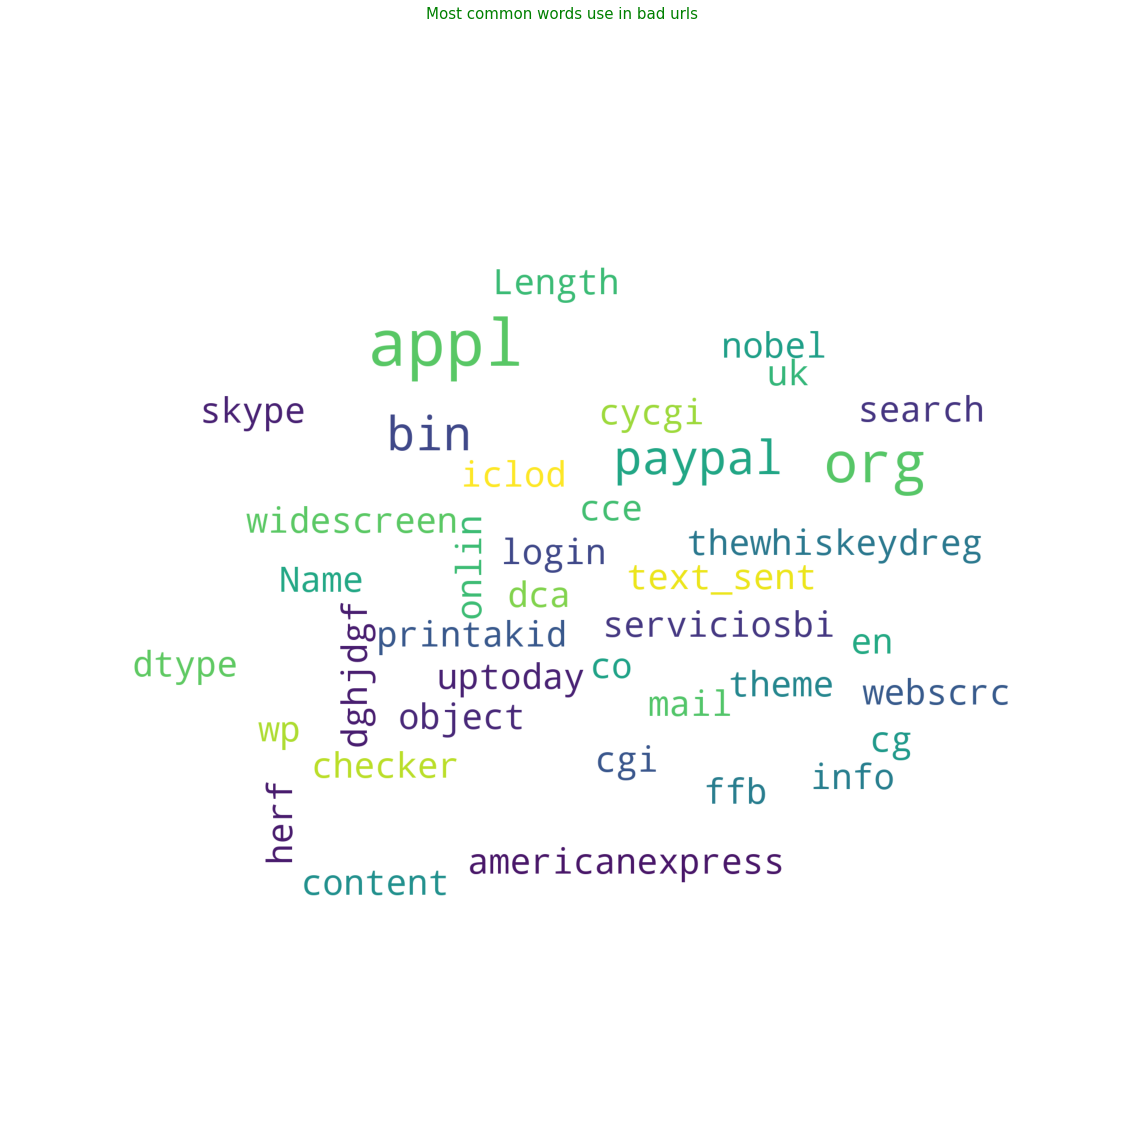

In [30]:
common_text = str(data)
common_mask = np.array(Image.open('comment.png'))
plot_wordcloud(common_text, common_mask, max_words=400, max_font_size=120, 
               title = 'Most common words use in bad urls', title_size=15)

Download more various type of images <a href='https://github.com/taruntiwarihp/raw_images/tree/master/Words%20cloud%20images'>here</a>

**2. Visualize internal links, it will shows all redirect links.** 

#### Scrape any website
* First, setting up the Chrome webdriver so we can scrape dynamic web pages.

#### Chrome webdriver
* WebDriver tool use for automated testing of webapps across many browsers. It provides capabilities for navigating to web pages, user input and more

In [7]:
browser = webdriver.Chrome(r"chromedriver.exe")

**You can download chromedriver.exe from my github <a href='https://github.com/taruntiwarihp/dataSets/blob/master/chromedriver_win32.zip'>here</a>**

* After set up the Chrome driver create two lists.
* First list named list_urls holds all the pages you’d like to scrape.
* Second, create an empty list where you’ll append links from each page.


In [8]:
list_urls = ['https://www.ezeephones.com/','https://www.ezeephones.com/about-us'] #here i take phishing sites 
links_with_text = []

* I took some phishing site to see were the hackers redirect(on different link) us.
* Use the BeautifulSoup library to extract only relevant hyperlinks for Google, i.e. links only with '<'a'>' tags with href attributes. 

#### BeautifulSoup
* It is use for getting data out of HTML, XML, and other markup languages. 

In [9]:
for url in list_urls:
    browser.get(url)
    soup = BeautifulSoup(browser.page_source,"html.parser")
    for line in soup.find_all('a'):
        href = line.get('href')
        links_with_text.append([url, href])

#### Turn the URL’s into a Dataframe
* After you get the list of your websites with hyperlinks turn them into a Pandas DataFrame with columns “from” (URL where the link resides) and “to” (link destination URL)

In [10]:
df = pd.DataFrame(links_with_text, columns=["from", "to"])

In [11]:
df.head()

,from,to
0,https://www.ezeephones.com/,None
1,https://www.ezeephones.com/,https://www.ezeephones.com/
2,https://www.ezeephones.com/,/cart
3,https://www.ezeephones.com/,/category/notch-phones
4,https://www.ezeephones.com/,/category/Deals - Of The Day


#### Step 3: Draw a graph
* Finally, use the aforementioned DataFrame to **visualize an internal link structure by feeding it to the Networkx method from_pandas_edgelist first** and draw it by calling nx.draw

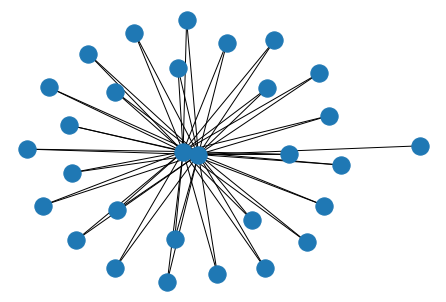

In [12]:
GA = nx.from_pandas_edgelist(df, source="from", target="to")
nx.draw(GA, with_labels=False)

### Creating Model

#### CountVectorizer
* CountVectorizer is used to transform a corpora of text to a vector of term / token counts.

In [30]:
#create cv object
cv = CountVectorizer()

In [31]:
#help(CountVectorizer())

In [32]:
feature = cv.fit_transform(phish_data.text_sent) #transform all text which we tokenize and stemed

In [33]:
feature[:5].toarray() # convert sparse matrix into array to print transformed features

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

#### * Spliting the data 

In [34]:
trainX, testX, trainY, testY = train_test_split(feature, phish_data.Label)

### LogisticRegression
* Logistic Regression is a Machine Learning classification algorithm that is used to predict the probability of a categorical dependent variable. In logistic regression, the dependent variable is a binary variable that contains data coded as 1 (yes, success, etc.) or 0 (no, failure, etc.). In other words, the logistic regression model predicts P(Y=1) as a function of X.

In [35]:
# create lr object
lr = LogisticRegression()

In [36]:
lr.fit(trainX,trainY)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [37]:
lr.score(testX,testY)

0.9640155238573728

.*** Logistic Regression is giving 96% accuracy, Now we will store scores in dict to see which model perform best**

In [38]:
Scores_ml = {}
Scores_ml['Logistic Regression'] = np.round(lr.score(testX,testY),2)

Training Accuracy : 0.9787820168976892
Testing Accuracy : 0.9640155238573728

CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.91      0.97      0.94     36993
        Good       0.99      0.96      0.98    100344

    accuracy                           0.96    137337
   macro avg       0.95      0.97      0.96    137337
weighted avg       0.97      0.96      0.96    137337


CONFUSION MATRIX


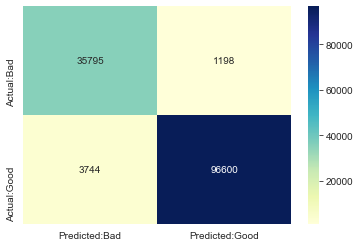

In [39]:
print('Training Accuracy :',lr.score(trainX,trainY))
print('Testing Accuracy :',lr.score(testX,testY))
con_mat = pd.DataFrame(confusion_matrix(lr.predict(testX), testY),
            columns = ['Predicted:Bad', 'Predicted:Good'],
            index = ['Actual:Bad', 'Actual:Good'])


print('\nCLASSIFICATION REPORT\n')
print(classification_report(lr.predict(testX), testY,
                            target_names =['Bad','Good']))

print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

### MultinomialNB
* Applying Multinomial Naive Bayes to NLP Problems. Naive Bayes Classifier Algorithm is a family of probabilistic algorithms based on applying Bayes' theorem with the “naive” assumption of conditional independence between every pair of a feature.

In [40]:
# create mnb object
mnb = MultinomialNB()

In [41]:
mnb.fit(trainX,trainY)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [42]:
mnb.score(testX,testY)

0.957025419224244

*** MultinomialNB gives us 95% accuracy**  

In [43]:
Scores_ml['MultinomialNB'] = np.round(mnb.score(testX,testY),2)

Training Accuracy : 0.9743719190600205
Testing Accuracy : 0.957025419224244

CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.91      0.94      0.92     38575
        Good       0.97      0.97      0.97     98762

    accuracy                           0.96    137337
   macro avg       0.94      0.95      0.95    137337
weighted avg       0.96      0.96      0.96    137337


CONFUSION MATRIX


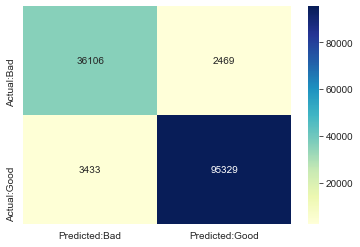

In [44]:
print('Training Accuracy :',mnb.score(trainX,trainY))
print('Testing Accuracy :',mnb.score(testX,testY))
con_mat = pd.DataFrame(confusion_matrix(mnb.predict(testX), testY),
            columns = ['Predicted:Bad', 'Predicted:Good'],
            index = ['Actual:Bad', 'Actual:Good'])


print('\nCLASSIFICATION REPORT\n')
print(classification_report(mnb.predict(testX), testY,
                            target_names =['Bad','Good']))

print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

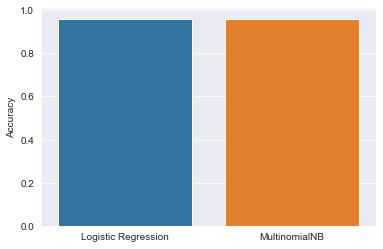

In [45]:
acc = pd.DataFrame.from_dict(Scores_ml,orient = 'index',columns=['Accuracy'])
sns.set_style('darkgrid')
sns.barplot(acc.index,acc.Accuracy)

*** So, Logistic Regression is the best fit model, Now we make sklearn pipeline using Logistic Regression**

In [46]:
pipeline_ls = make_pipeline(CountVectorizer(tokenizer = RegexpTokenizer(r'[A-Za-z]+').tokenize,stop_words='english'), LogisticRegression())
##(r'\b(?:http|ftp)s?://\S*\w|\w+|[^\w\s]+') ([a-zA-Z]+)([0-9]+) -- these tolenizers giving me low accuray 

In [47]:
trainX, testX, trainY, testY = train_test_split(phish_data.URL, phish_data.Label)

In [48]:
pipeline_ls.fit(trainX,trainY)

Pipeline(memory=None,
         steps=[('countvectorizer',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words='english', strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=<bo...mpty=True, flags=<RegexFlag.UNICODE|DOTALL|MULTILINE: 56>)>,
                                 vocabulary=None)),
                ('logisticregression',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                   

In [49]:
pipeline_ls.score(testX,testY) 

0.966316433299111

Training Accuracy : 0.9805465414590459
Testing Accuracy : 0.966316433299111

CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.91      0.97      0.94     36955
        Good       0.99      0.97      0.98    100382

    accuracy                           0.97    137337
   macro avg       0.95      0.97      0.96    137337
weighted avg       0.97      0.97      0.97    137337


CONFUSION MATRIX


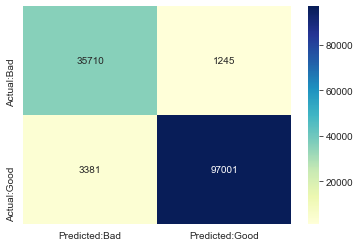

In [50]:
print('Training Accuracy :',pipeline_ls.score(trainX,trainY))
print('Testing Accuracy :',pipeline_ls.score(testX,testY))
con_mat = pd.DataFrame(confusion_matrix(pipeline_ls.predict(testX), testY),
            columns = ['Predicted:Bad', 'Predicted:Good'],
            index = ['Actual:Bad', 'Actual:Good'])


print('\nCLASSIFICATION REPORT\n')
print(classification_report(pipeline_ls.predict(testX), testY,
                            target_names =['Bad','Good']))

print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

In [51]:
pickle.dump(pipeline_ls,open('phishing.pkl','wb'))

In [52]:
loaded_model = pickle.load(open('phishing.pkl', 'rb'))
result = loaded_model.score(testX,testY)
print(result)

0.966316433299111


***That’s it. See, it's that simple yet so effective. We get an accuracy of 98%. That’s a very high value for a machine to be able to detect a malicious URL with. Want to test some links to see if the model gives good predictions? Sure. Let's do it**

In [59]:
# * Bad links => this are phishing sites
# yeniik.com.tr/wp-admin/js/login.alibaba.com/login.jsp.php
# fazan-pacir.rs/temp/libraries/ipad
# www.tubemoviez.exe
# svision-online.de/mgfi/administrator/components/com_babackup/classes/fx29id1.txt

# * Good links => this are not phishing sites
# www.youtube.com/
# youtube.com/watch?v=qI0TQJI3vdU
# www.retailhellunderground.com/
# restorevisioncenters.com/html/technology.html

In [63]:
predict_bad = ['yeniik.com.tr/wp-admin/js/login.alibaba.com/login.jsp.php','fazan-pacir.rs/temp/libraries/ipad','tubemoviez.exe','svision-online.de/mgfi/administrator/components/com_babackup/classes/fx29id1.txt']
predict_good = ['youtube.com/','youtube.com/watch?v=qI0TQJI3vdU','retailhellunderground.com/','restorevisioncenters.com/html/technology.html']
loaded_model = pickle.load(open('phishing.pkl', 'rb'))
#predict_bad = vectorizers.transform(predict_bad)
# predict_good = vectorizer.transform(predict_good)
result = loaded_model.predict(predict_bad)
result2 = loaded_model.predict(predict_good)
print(result)
print("*"*30)
print(result2)

['bad' 'bad' 'bad' 'bad']
******************************
['good' 'good' 'good' 'good']


https://research.aalto.fi/en/datasets/phishstorm-phishing-legitimate-url-dataset